# BIOS512 Assignment #3

Import the 📈Tidyverse into your `R` session

In [43]:
library('tidyverse')
library('ggrepel')

In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv)

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [3]:
df <- read_csv("https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv?raw=true")
head(df, 6)


── Column specification ────────────────────────────────────────────────────────
cols(
  index = col_double(),
  state = col_character(),
  year = col_character(),
  name = col_character(),
  type = col_character(),
  city = col_character(),
  county = col_character(),
  district = col_logical(),
  enroll = col_double(),
  mmr = col_double(),
  overall = col_double(),
  xrel = col_logical(),
  xmed = col_double(),
  xper = col_double(),
  lat = col_double(),
  lng = col_double()
)




index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,NA,51,100,-1,NA,NA,NA,31.34782,-110.9380
2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,NA,22,100,-1,NA,NA,NA,32.22192,-110.8961
3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,NA,85,100,-1,NA,NA,NA,32.13049,-111.1170
4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,NA,60,100,-1,NA,NA,NA,33.48545,-112.1306
5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,NA,43,100,-1,NA,2.33,2.33,33.49562,-112.2247
6,Arizona,2018-19,Alfred F Garcia,Public,Phoenix,Maricopa,NA,36,100,-1,NA,NA,NA,33.43532,-112.1168


The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fracion of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [6]:
# create the df_vacc_rates here

df_vacc_rates <- df %>%
    filter(mmr >= 0) %>%
    group_by(state) %>%
    summarize(n_schools = n(),
              n_vacc = sum(mmr >= 95, na.rm=TRUE),
              vacc_rate = (sum(mmr >= 95, na.rm=TRUE))/n())
df_vacc_rates

state,n_schools,n_vacc,vacc_rate
<chr>,<int>,<int>,<dbl>
Arizona,1171,593,0.506404782
Arkansas,567,2,0.003527337
California,14225,12639,0.888506151
Colorado,1507,939,0.623092236
Connecticut,589,478,0.811544992
Illinois,7686,6893,0.896825397
Maine,357,169,0.473389356
Massachusetts,954,826,0.865828092
Minnesota,1593,755,0.473948525


Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

In [11]:
df_vacc_rates %>%
    arrange(vacc_rate) %>%
    head(1)

# Arkansas has the smallest fraction of schools above the CDC target vaccination rate

state,n_schools,n_vacc,vacc_rate
<chr>,<int>,<int>,<dbl>
Arkansas,567,2,0.003527337


**Make a ECDF plot of the school vaccination rates in North Carolina.** Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `row_number`, `mutate`, and `arrange`.

In [15]:
nc <- df %>%
    filter(state == "North Carolina" & overall >= 0) %>%
    select("index","state","overall") %>%
    arrange(overall) %>%
    mutate(rn = row_number(), fraction_of_schools = rn / max(rn))
head(nc, 6)

index,state,overall,rn,fraction_of_schools
<dbl>,<chr>,<dbl>,<int>,<dbl>
1766,North Carolina,21.7,1,0.0004798464
1765,North Carolina,40.3,2,0.0009596929
1764,North Carolina,42.9,3,0.0014395393
1763,North Carolina,43.5,4,0.0019193858
1762,North Carolina,45.0,5,0.0023992322
1761,North Carolina,45.3,6,0.0028790787


overall,fraction_of_schools
<dbl>,<dbl>
95,0.65


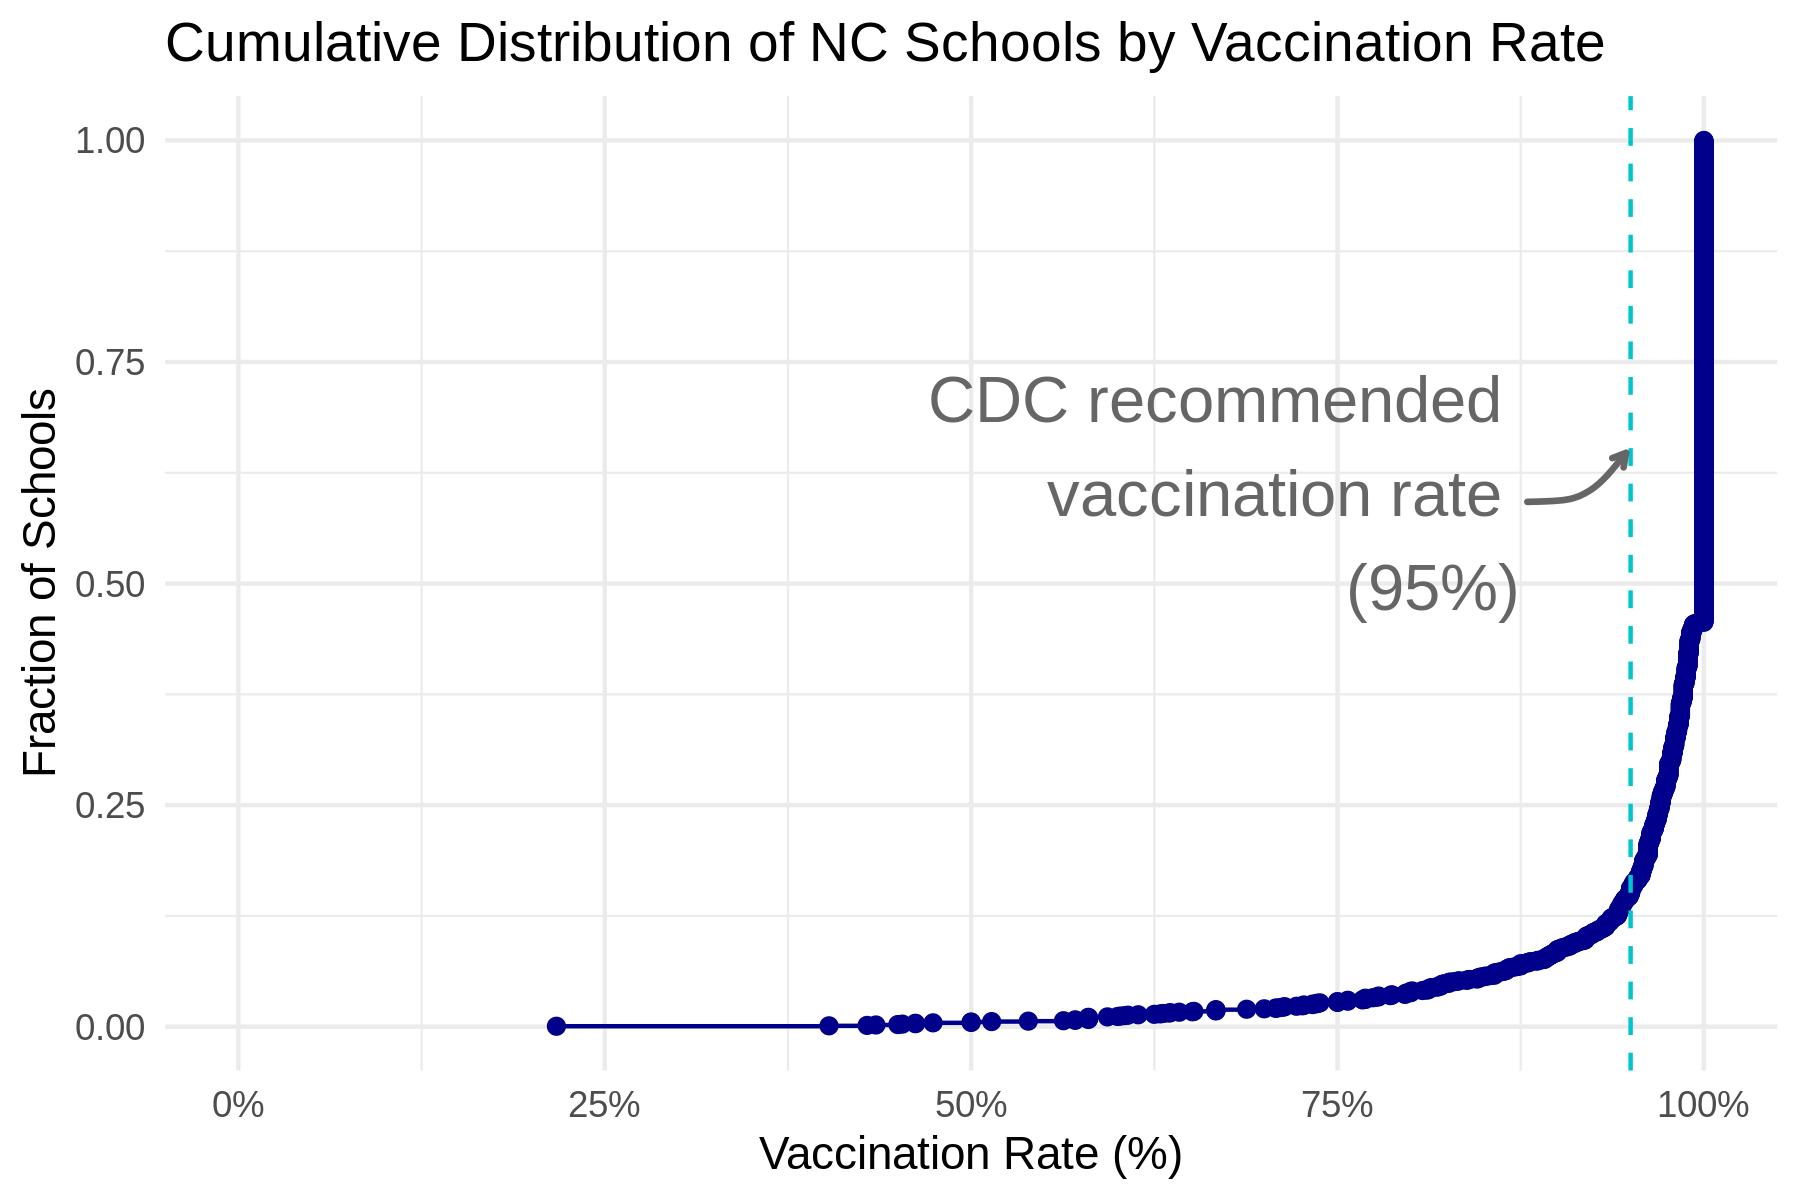

In [102]:
nc_label = data.frame(
    overall = 95,
    fraction_of_schools = .65
    )
nc_label

options(repr.plot.width=6, repr.plot.height=4)
p = ggplot(data=nc, aes(x=overall, y=fraction_of_schools)) +
    geom_point(na.rm=T, size=1.5, color="blue4") + geom_step(na.rm=T, color="blue4") +
    theme_minimal() +  
    scale_x_continuous(limits = c(0,100), labels = function(x) paste0(x, "%")) +                
    geom_vline(aes(xintercept = 95), color = 'turquoise3', linetype='dashed') +
    labs(x="Vaccination Rate (%)", y="Fraction of Schools", 
         title="Cumulative Distribution of NC Schools by Vaccination Rate") +
    geom_text_repel(
            data = nc_label,
            nudge_y = 0.11,
            nudge_x = -15,
            segment.size = 0.75,
            size = 5.5,
            color = "gray40",
            segment.color = "grey40",
            segment.curvature = .1,
            segment.ncp = 1,
            xlim=c(45,85),
            ylim=c(.55,.75),
            direction="x",
            hjust=1,
            arrow = arrow(length = unit(0.015, "npc")),
            aes(x=overall, y=fraction_of_schools, 
                label = "CDC recommended 
vaccination rate 
(95%)
"
               )
        )                   

p

(My solution is below if you want to peek 👀. Uncomment the code, change the cell to `markdown`, and exectute it.)

![](https://github.com/chuckpr/BIOS512/blob/main/assignments/measles-chart.png?raw=true)

Is the median vaccination rate for NC schools above the CDC recommended target?

_The ECDF intersects 0.50 on the y-axis at 100% > 95%, so yes, the median vaccination rate for NC schools is above the CDC recommended target of 95%. This is double-checked in the summary below._

In [104]:
nc %>%
    summarize(med = median(overall))

med
<dbl>
100
